In [20]:
import pandas as pd
import os
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from joblib import Parallel, delayed
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler,RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('health.csv')

In [3]:
df.head()

,Country Name,who_region,world_bank_income_level,Year,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Adult obesity%,Tobacco use%,...,"Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Suicide mortality rate (per 100,000 population)","Suicide mortality rate, female (per 100,000 female population)","Suicide mortality rate, male (per 100,000 male population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
0,Afghanistan,2,1,2000,55.00,46.80,0.0,4.1,2.1,20.0,...,4.6,11.6,6.1,20.0,10.557430,4.722564,16.987158,5.204082,2.385053,8.483260
1,Afghanistan,2,1,2001,55.49,47.23,0.0,4.9,2.1,20.0,...,6.0,10.7,7.6,18.4,10.592884,4.865841,16.737011,5.301519,2.446300,8.416361
2,Afghanistan,2,1,2002,55.98,47.66,0.0,4.9,2.1,20.0,...,4.3,9.9,5.6,16.9,10.643266,4.872512,16.723281,5.321516,2.447079,8.408835
3,Afghanistan,2,1,2003,56.47,48.09,0.0,4.9,2.1,20.0,...,4.2,9.2,5.4,15.6,4.900000,4.800000,5.000000,0.003000,0.000700,0.005000
4,Afghanistan,2,1,2004,56.96,48.52,0.0,4.9,2.1,20.0,...,4.0,8.6,5.3,14.3,5.000000,4.800000,5.200000,0.003000,0.000700,0.005000


In [4]:
df.describe()

,who_region,world_bank_income_level,Year,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Adult obesity%,Tobacco use%,Alcohol consumption,...,"Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Suicide mortality rate (per 100,000 population)","Suicide mortality rate, female (per 100,000 female population)","Suicide mortality rate, male (per 100,000 male population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
count,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,...,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000,4032.000000
mean,2.333333,1.541667,2011.500000,70.145109,54.657703,0.969090,10.703408,14.196399,24.891818,2.785497,...,3.173388,5.855630,4.798388,8.220412,10.841260,5.131647,16.714537,5.398871,2.248772,8.708994
std,1.999256,1.214422,6.923045,8.630652,12.376064,2.074377,8.844669,6.968053,2.935228,1.627502,...,3.298526,4.860308,6.363862,6.878779,8.258126,3.637770,13.804740,3.874454,1.764345,6.209568
min,0.000000,0.000000,2000.000000,31.300000,28.000000,-0.300000,-0.700000,2.100000,20.000000,0.000000,...,0.200000,0.800000,0.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000000,2005.750000,64.457500,45.726026,0.100000,5.000000,8.245902,22.309210,1.380894,...,1.000000,2.400000,0.900000,3.300000,5.600000,2.800000,8.200000,2.017500,0.680000,3.297500
50%,2.000000,2.000000,2011.500000,72.354650,56.355000,0.258738,8.600000,14.296578,24.881804,2.776925,...,1.900000,4.200000,1.900000,5.800000,10.409643,4.902684,15.734605,5.363283,2.218642,8.620000
75%,3.000000,3.000000,2017.250000,76.140200,64.980000,0.993448,13.500000,20.065121,27.404187,4.219536,...,4.200000,7.600000,6.300000,10.800000,12.000000,5.900000,17.600000,7.800000,3.210000,12.500000
max,6.000000,4.000000,2023.000000,84.700000,74.100000,21.000000,92.600000,26.197811,30.000000,5.600000,...,40.500000,40.400000,53.200000,47.500000,92.600000,39.500000,147.800000,19.400000,8.680000,31.050000


Removing Nulls


In [5]:
# def impute_column(df, column, columns_to_use):

#     X = df[columns_to_use].drop(columns=[column], errors='ignore')
#     y = df[column]


#     X = X[y.notna()]
#     y = y.dropna()

 
#     model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # Use multiple cores
#     model.fit(X, y)


#     missing_rows = df[column].isnull()
#     df.loc[missing_rows, column] = model.predict(df.loc[missing_rows, columns_to_use].drop(columns=[column], errors='ignore'))

#     return df

# def process_file(file, base_dir):
#     df = pd.read_csv(base_dir + file)

#     columns_to_use = df.columns[4:]  
#     columns_with_missing = [col for col in columns_to_use if df[col].isnull().any()]

#     df = Parallel(n_jobs=-1)(delayed(impute_column)(df, column, columns_to_use) for column in columns_with_missing)

#     df = df[-1]  
#     df.to_csv(base_dir + 'imputed_' + file, index=False)
#     print(f"Done processing {file}") 

# base_dir = 'worldBankData/'
# process_file('economicData.csv', base_dir)


In [6]:
df.head()

,Country Name,who_region,world_bank_income_level,Year,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Adult obesity%,Tobacco use%,...,"Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Suicide mortality rate (per 100,000 population)","Suicide mortality rate, female (per 100,000 female population)","Suicide mortality rate, male (per 100,000 male population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
0,Afghanistan,2,1,2000,55.00,46.80,0.0,4.1,2.1,20.0,...,4.6,11.6,6.1,20.0,10.557430,4.722564,16.987158,5.204082,2.385053,8.483260
1,Afghanistan,2,1,2001,55.49,47.23,0.0,4.9,2.1,20.0,...,6.0,10.7,7.6,18.4,10.592884,4.865841,16.737011,5.301519,2.446300,8.416361
2,Afghanistan,2,1,2002,55.98,47.66,0.0,4.9,2.1,20.0,...,4.3,9.9,5.6,16.9,10.643266,4.872512,16.723281,5.321516,2.447079,8.408835
3,Afghanistan,2,1,2003,56.47,48.09,0.0,4.9,2.1,20.0,...,4.2,9.2,5.4,15.6,4.900000,4.800000,5.000000,0.003000,0.000700,0.005000
4,Afghanistan,2,1,2004,56.96,48.52,0.0,4.9,2.1,20.0,...,4.0,8.6,5.3,14.3,5.000000,4.800000,5.200000,0.003000,0.000700,0.005000


Endoding Part

In [7]:
encoder=LabelEncoder()
df['Country Name']=encoder.fit_transform(df['Country Name'])

Outliers Detection

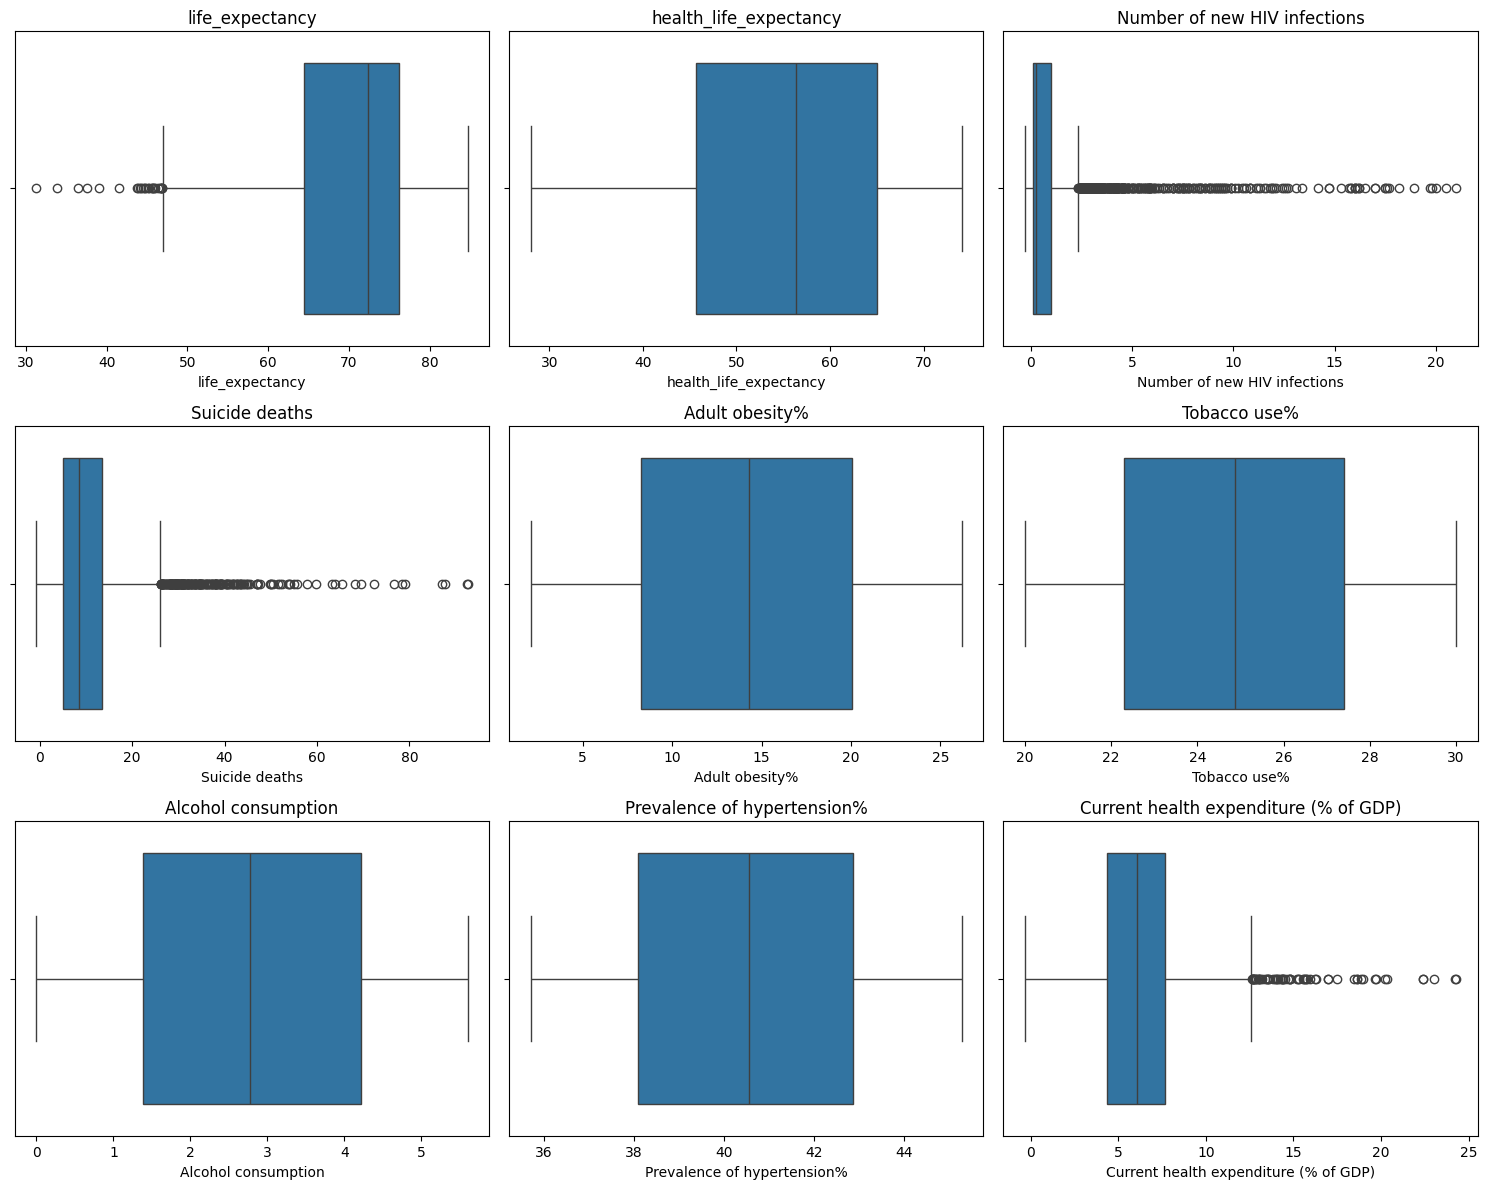

In [ ]:
columns = [
    'life_expectancy', 'health_life_expectancy', 'Number of new HIV infections',
    'Suicide deaths', 'Adult obesity%', 'Tobacco use%', 'Alcohol consumption',
    'Prevalence of hypertension%', 'Current health expenditure (% of GDP)'
]

plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1) 
    

    sns.boxplot(x=df[column])
    

    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [21]:
scaler= RobustScaler()
data = df.iloc[:, 4:]
normalized_data = scaler.fit_transform(data)
df_normalized = pd.DataFrame(normalized_data, columns=data.columns)
df = pd.concat([df.iloc[:, :4], df_normalized], axis=1)

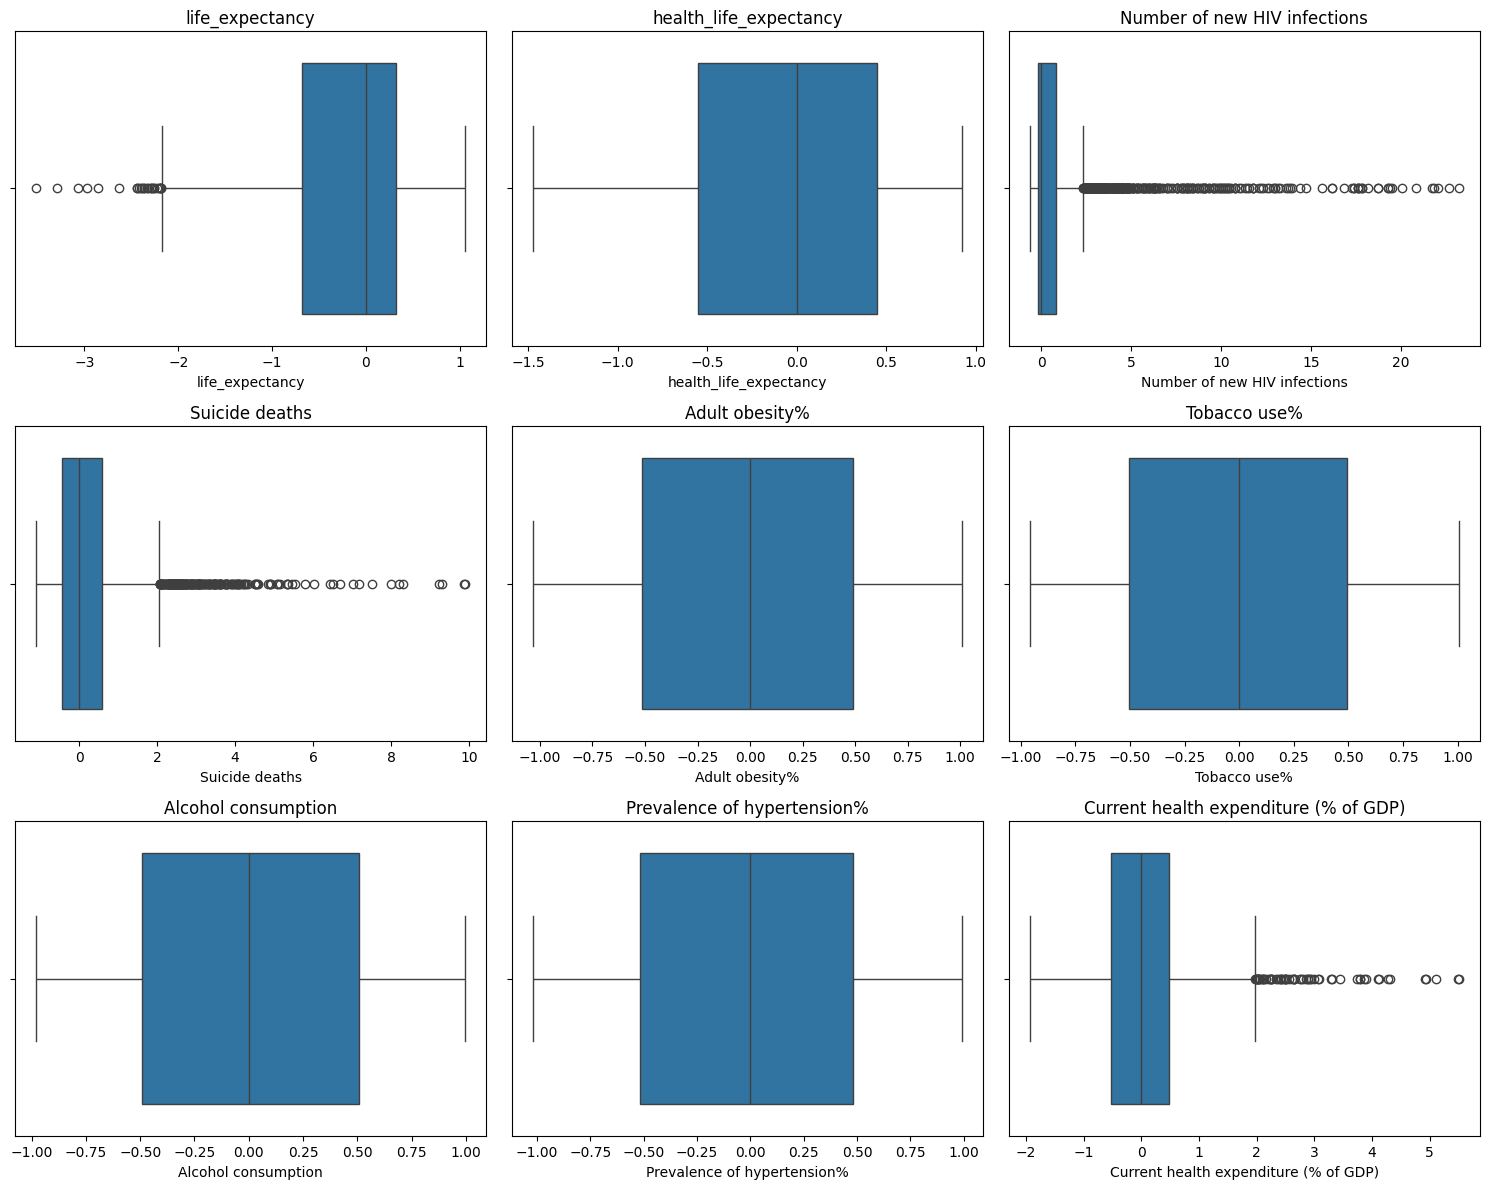

In [22]:
### Again checking the outliers
columns = [
    'life_expectancy', 'health_life_expectancy', 'Number of new HIV infections',
    'Suicide deaths', 'Adult obesity%', 'Tobacco use%', 'Alcohol consumption',
    'Prevalence of hypertension%', 'Current health expenditure (% of GDP)'
]

# Create a larger figure for the subplots (3 rows and 3 columns)
plt.figure(figsize=(15, 12))

# Iterate through each column to create individual subplots with boxplots
for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns
    
    # Create a boxplot for each column to visualize outliers
    sns.boxplot(x=df[column])
    
    # Title for each subplot
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

In [23]:
duplicate_count = sum(pd.DataFrame(df).duplicated())
print(f"Number of duplicate rows: {duplicate_count}")
## No Duplicate Rows

Number of duplicate rows: 0


In [24]:
df.head()

,Country Name,who_region,world_bank_income_level,Year,life_expectancy,health_life_expectancy,Number of new HIV infections,Suicide deaths,Adult obesity%,Tobacco use%,...,"Probability of dying among adolescents ages 10-14 years (per 1,000)","Probability of dying among adolescents ages 15-19 years (per 1,000)","Probability of dying among children ages 5-9 years (per 1,000)","Probability of dying among youth ages 20-24 years (per 1,000)","Suicide mortality rate (per 100,000 population)","Suicide mortality rate, female (per 100,000 female population)","Suicide mortality rate, male (per 100,000 male population)","Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","Total alcohol consumption per capita, female (liters of pure alcohol, projected estimates, female 15+ years of age)","Total alcohol consumption per capita, male (liters of pure alcohol, projected estimates, male 15+ years of age)"
0,0,2,1,2000,-1.485500,-0.496261,-0.289594,-0.529412,-1.031928,-0.95816,...,0.84375,1.423077,0.777778,1.893333,0.023092,-0.058103,0.133250,-0.027532,0.065775,-0.014859
1,0,2,1,2001,-1.443558,-0.473928,-0.289594,-0.435294,-1.031928,-0.95816,...,1.28125,1.250000,1.055556,1.680000,0.028631,-0.011885,0.106639,-0.010681,0.089983,-0.022129
2,0,2,1,2002,-1.401615,-0.451595,-0.289594,-0.435294,-1.031928,-0.95816,...,0.75000,1.096154,0.685185,1.480000,0.036504,-0.009733,0.105178,-0.007223,0.090291,-0.022946
3,0,2,1,2003,-1.359673,-0.429262,-0.289594,-0.435294,-1.031928,-0.95816,...,0.71875,0.961538,0.648148,1.306667,-0.860882,-0.033124,-1.141979,-0.926984,-0.876657,-0.936159
4,0,2,1,2004,-1.317730,-0.406929,-0.289594,-0.435294,-1.031928,-0.95816,...,0.65625,0.846154,0.629630,1.133333,-0.845257,-0.033124,-1.120703,-0.926984,-0.876657,-0.936159


In [ ]:
columns = [
    'Number of new HIV infections',
    'Children (0-14) living with HIV',
    'Children (ages 0-14) newly infected with HIV',
    'Incidence of HIV, ages 15-24 (per 1,000 uninfected population ages 15-24)',
    'Incidence of HIV, ages 15-49 (per 1,000 uninfected population ages 15-49)',
    'Incidence of HIV, all (per 1,000 uninfected population)',
    'Prevalence of HIV, female (% ages 15-24)',
    'Prevalence of HIV, male (% ages 15-24)',
    'Prevalence of HIV, total (% of population ages 15-49)'
]


      Number of new HIV infections  Children (0-14) living with HIV  \
0                        -0.289594                        -0.413924   
1                        -0.289594                        -0.413924   
2                        -0.289594                        -0.413924   
3                        -0.289594                        -0.396880   
4                        -0.289594                        -0.396880   
...                            ...                              ...   
4027                      1.501220                         6.392470   
4028                      1.277368                         5.824323   
4029                      1.053516                         5.824323   
4030                      0.941590                         5.142548   
4031                      0.829665                         4.688031   

      Children (ages 0-14) newly infected with HIV  \
0                                        -0.206242   
1                                      